In [58]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_timestamp, date_format
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import requests, datetime

spark = SparkSession.builder.appName("WeatherPlot").getOrCreate()


Download dataset

In [4]:
url = "https://raw.githubusercontent.com/Xiru1024/BigDataExercise/refs/heads/main/exampleData.csv"
local_path = "/home/jovyan/BigDataExercise/report1/weather.csv"
with open(local_path, "wb") as f:
    f.write(requests.get(url).content)

In [5]:
df = spark.read.option("header", True).csv("weather.csv")

Line plot for temperature over time

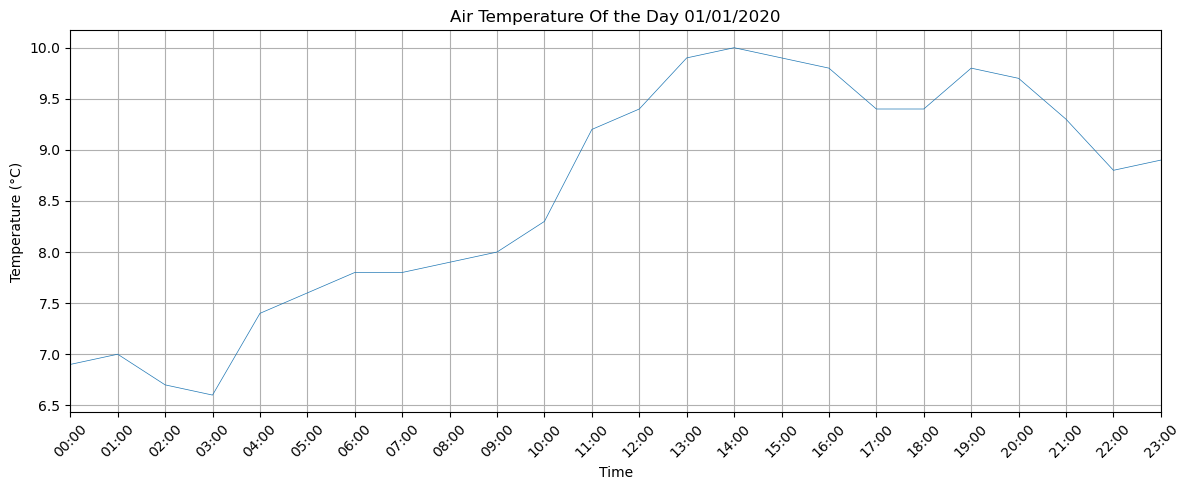

In [60]:
df_plot1 = (
    df.withColumn("dateTime", to_timestamp("dateTime", "dd-MMM-yyyy HH:mm"))
      .withColumn("air_temperature", col("air_temperature").cast("float"))
      .filter((col("air_temperature").isNotNull()) &
              (date_format("dateTime", "yyyy-MM-dd") == "2020-01-01"))
)

# df_plot1.show(n=df.count())
# writePath = "/home/jovyan/BigDataExercise/report1/plot1DF.csv"
# df_plot1.write.mode("overwrite").csv(writePath, header=True) 

df_plot1_panda = df_plot1.select("dateTime", "air_temperature").toPandas()

plt.figure(figsize=(12, 5))
plt.plot(df_plot1_panda["dateTime"], df_plot1_panda["air_temperature"], linewidth=0.5)
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xlim(datetime.datetime(2020, 1, 1, 0, 0), datetime.datetime(2020, 1, 1, 23, 0))
plt.title("Air Temperature Of the Day 01/01/2020")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Plot 2 Histogram - Distribution of Speed

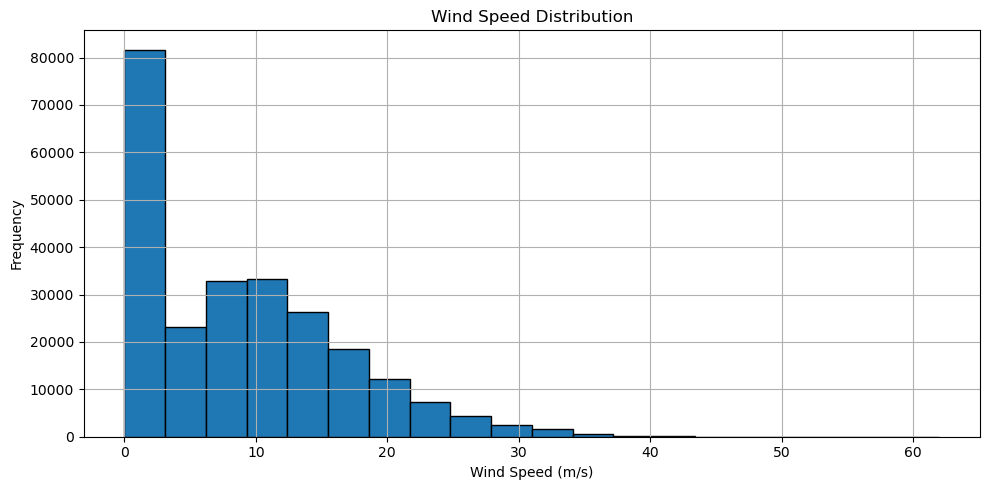

In [62]:
df_hist = (
    df.withColumn("wind_speed", col("wind_speed").cast("float"))
      .filter(col("wind_speed").isNotNull())
)

df_hist_panda = df_hist.select("wind_speed").toPandas()

plt.figure(figsize=(10, 5))
plt.hist(df_hist_panda["wind_speed"], bins=20, edgecolor='black')
plt.title("Wind Speed Distribution")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()



Plot 3 - Scatter of temperature and humidty

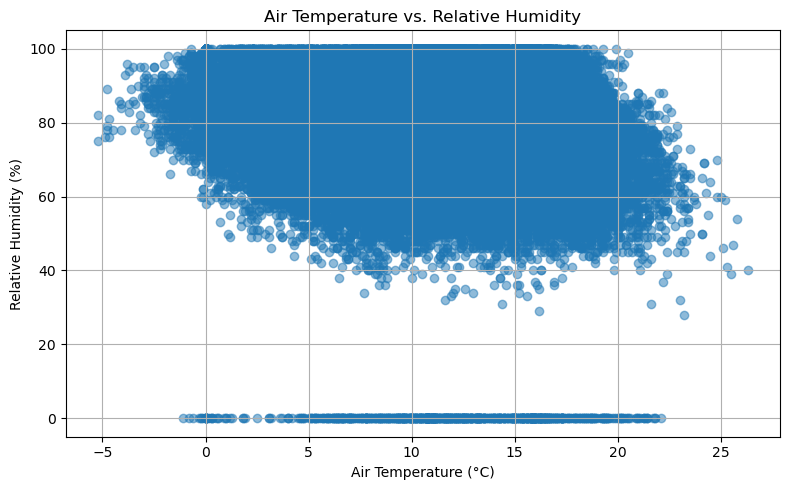

In [69]:
df_scatter = (
    df.withColumn("air_temperature", col("air_temperature").cast("float"))
      .withColumn("relative_humidity", col("relative_humidity").cast("float"))
      .filter(col("air_temperature").isNotNull() & col("relative_humidity").isNotNull())
)

df_scatter_panda = df_scatter.select("air_temperature", "relative_humidity").toPandas()


plt.figure(figsize=(8, 5))
plt.scatter(df_scatter_panda["air_temperature"], df_scatter_panda["relative_humidity"], alpha=0.5)
plt.title("Air Temperature vs. Relative Humidity")
plt.xlabel("Air Temperature (°C)")
plt.ylabel("Relative Humidity (%)")
plt.grid(True)
plt.tight_layout()
plt.show()



Plot4 - Monthly Rainfall barchart

+-----+------------------+
|month|        total_rain|
+-----+------------------+
|    1|1966.0000124946237|
|    2|1613.9000119790435|
|    3|1302.4000072404742|
|    4|1304.3000072166324|
|    5|1279.7000096589327|
|    6|1507.8000081777573|
|    7|1474.3000053092837|
|    8| 1649.800005234778|
|    9|1415.2000072970986|
|   10|  2152.40000859648|
|   11| 2092.200009137392|
|   12|2352.7000121995807|
+-----+------------------+



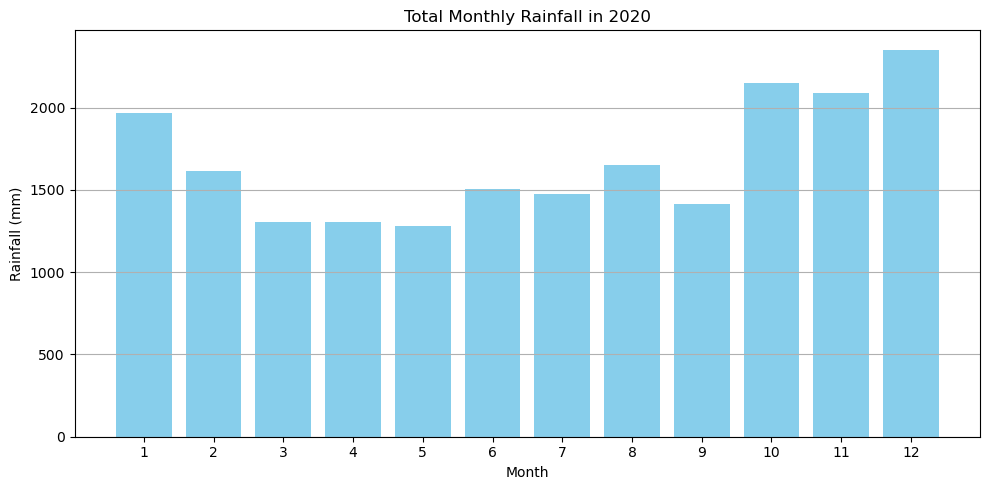

In [82]:
from pyspark.sql.functions import month, year, col

df_monthly_rain = (
    df.withColumn("dateTime", to_timestamp("dateTime", "dd-MMM-yyyy HH:mm"))
      .withColumn("precipitation", col("precipitation").cast("float"))
      
      .withColumn("month", month(col("dateTime")))
      .groupBy("month")
      .sum("precipitation")
      .orderBy("month")
      .withColumnRenamed("sum(precipitation)", "total_rain")
)
df_monthly_rain.show()
df_monthly_rain_panda = df_monthly_rain.toPandas()

plt.figure(figsize=(10, 5))
plt.bar(df_monthly_rain_panda["month"], df_monthly_rain_panda["total_rain"], color='skyblue')
plt.xticks(df_monthly_rain_panda["month"])
plt.title("Total Monthly Rainfall in 2020")
plt.xlabel("Month")
plt.ylabel("Rainfall (mm)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

